In [1]:
import pandas as pd

dataset = pd.read_csv("iris.csv").values

data=dataset[:,0:4]
target=dataset[:,4]
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [2]:
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)
#new_target

In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, new_target, test_size=0.1)

In [4]:
from keras.layers import Dense
from keras.models import Sequential

#empty NN
model=Sequential()

#1st hidden layer
model.add(Dense(8,input_dim=4,activation="relu"))
#2nd hidden layer
model.add(Dense(16,input_dim=8,activation="relu"))
#3rd hidden layer
model.add(Dense(8,input_dim=16,activation="relu"))
#output layer
model.add(Dense(3,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.fit(train_data, train_target, epochs=1500)

Epoch 1/1500
5/5 [==============================] - 1s 7ms/step - loss: 3.2191 - accuracy: 0.3333
Epoch 2/1500
5/5 [==============================] - 0s 5ms/step - loss: 2.8344 - accuracy: 0.3333
Epoch 3/1500
5/5 [==============================] - 0s 4ms/step - loss: 2.4974 - accuracy: 0.3333
Epoch 4/1500
5/5 [==============================] - 0s 5ms/step - loss: 2.1808 - accuracy: 0.3333
Epoch 5/1500
5/5 [==============================] - 0s 6ms/step - loss: 1.9220 - accuracy: 0.3333
Epoch 6/1500
5/5 [==============================] - 0s 6ms/step - loss: 1.7058 - accuracy: 0.3333
Epoch 7/1500
5/5 [==============================] - 0s 4ms/step - loss: 1.5183 - accuracy: 0.3333
Epoch 8/1500
5/5 [==============================] - 0s 4ms/step - loss: 1.3700 - accuracy: 0.3037
Epoch 9/1500
5/5 [==============================] - 0s 3ms/step - loss: 1.2694 - accuracy: 0.0222
Epoch 10/1500
5/5 [==============================] - 0s 5ms/step - loss: 1.1925 - accuracy: 0.0593
Epoch 11/1500
5/5 [

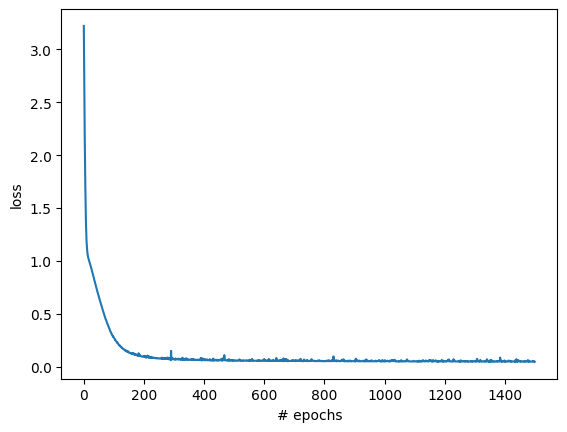

In [6]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.xlabel("# epochs")
plt.ylabel("loss")
plt.show()

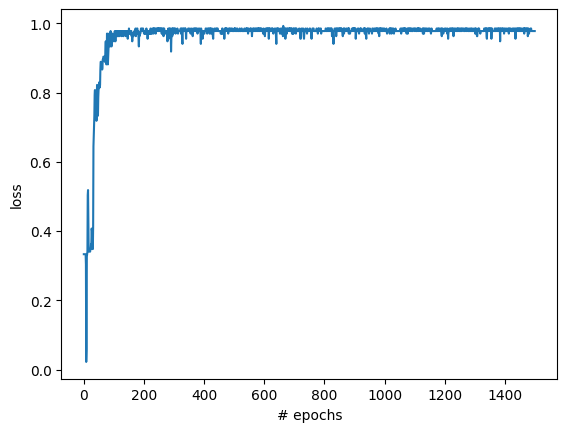

In [7]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.xlabel("# epochs")
plt.ylabel("loss")
plt.show()

In [8]:
model.evaluate(test_data, test_target)

1/1 [==============================] - 0s 297ms/step - loss: 0.0020 - accuracy: 1.0000


[0.001980414381250739, 1.0]

In [9]:
predicted_target=model.predict(test_data)

1/1 [==============================] - 0s 160ms/step


In [10]:
print(predicted_target)
print(test_target)

[[9.9998432e-01 1.5617401e-05 1.4091005e-09]
 [8.1646889e-10 6.7827270e-05 9.9993211e-01]
 [5.3103849e-07 1.1834747e-02 9.8816460e-01]
 [9.9996263e-01 3.7341288e-05 6.1683498e-09]
 [4.5924031e-07 1.2427596e-02 9.8757201e-01]
 [9.9999040e-01 9.5252672e-06 5.9912669e-10]
 [3.5487719e-05 9.9993581e-01 2.8553906e-05]
 [2.2864760e-05 9.9914527e-01 8.3180866e-04]
 [4.7973714e-08 1.0171225e-03 9.9898285e-01]
 [9.9999213e-01 7.8322964e-06 3.6366807e-10]
 [2.2701317e-05 9.9979872e-01 1.7863276e-04]
 [2.1762624e-05 9.9818939e-01 1.7888554e-03]
 [1.1276144e-05 9.9927264e-01 7.1606872e-04]
 [2.1530386e-08 4.7061103e-04 9.9952936e-01]
 [9.9999261e-01 7.3720512e-06 4.3803469e-10]]
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [11]:
import numpy as np
label=np.argmax(predicted_target,axis=1)
targets=np.argmax(test_target,axis=1)
print(label)
print(targets)

[0 2 2 0 2 0 1 1 2 0 1 1 1 2 0]
[0 2 2 0 2 0 1 1 2 0 1 1 1 2 0]


In [12]:
model.save('iris.h5')